In [14]:
import torch
import torch.nn as nn
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
!wget -q https://th.bing.com/th/id/OIP.YStozDiRWuUlT8T9Tmo45QHaEo?rs=1&pid=ImgDetMain
!wget -q https://github.com/nmilosev/pytorch-arm-builds/raw/master/imagenet_classes.txt

In [ ]:
with open('imagenet_classes.txt') as f:
  labels=[line.strip() for line in f.readlines()]

In [ ]:
labels[:5]

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark']

In [ ]:
net = models.shufflenet_v2_x1_0(pretrained=True)
net.eval()

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225]
    )
])

In [ ]:
def infer(img):
  img_t = transform(img)
  batch_t = torch.unsqueeze(img_t, 0)
  out = net(batch_t)
  percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
  _, indices = torch.sort(out, descending=True)
  result = [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]
  return result

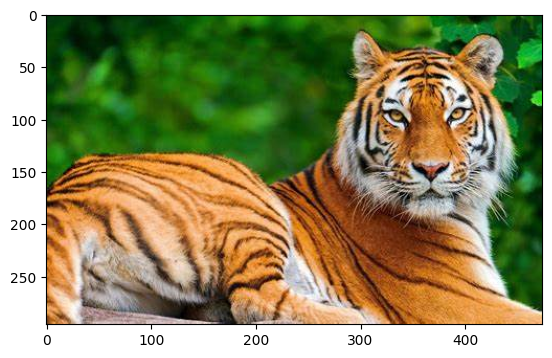

In [15]:
img = Image.open('tiger.jpg')
plt.imshow(img)

In [16]:
infer(img)

[('tiger, Panthera tigris', 97.85455322265625),
 ('tiger cat', 2.145040273666382),
 ('lynx, catamount', 0.00019580288790166378),
 ('monarch, monarch butterfly, milkweed butterfly, Danaus plexippus',
  4.257278851582669e-05),
 ('tabby, tabby cat', 3.193935117451474e-05)]